In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def load_data(name):
    data = []
    f=open(name)
    for l in f:
        data.append([int(c) for c in l.strip(" \n\r")])
    data = np.array(data)
    
    data[data==0]=-1
    
    return data

In [3]:
def find_1d_array_in_2d_array(arr_2d, arr_1d):
    for i in range(len(arr_2d)):
        for j in range(len(arr_2d[i]) - len(arr_1d) + 1):
            if np.array_equal(arr_2d[i][j:j+len(arr_1d)],arr_1d):
                return (i, j)
    return None

In [4]:
def reverse_rows(matrix):
    for row in matrix:
        row.reverse()

In [5]:
def get_interactions(bonds, X, Y, seed):
    Y2 = int(Y/2)
    
    interactions = np.zeros((2*X*Y))

    for i in range(bonds.shape[0]):
        for j in range(bonds.shape[1]):

            j_spin = int(j/4)

            ipp = (i + 1) if (i + 1 < X) else 0
            inn = (i - 1) if (i - 1 >= 0) else X - 1
            jpp = (j_spin + 1) if (j_spin + 1 < Y2) else 0
            jnn = (j_spin - 1) if (j_spin - 1 >= 0) else Y2 - 1

            icpp = 2*(X-1)*Y2 + 2*(Y2*(i+1) + j_spin) + i%2
            icnn = 2*(X-1)*Y2 + 2*(Y2*(inn+1) + j_spin) + i%2

            joff = jpp if (i%2) else jnn
            
                    
            if (i % 2):
                if (j + 1 > Y2):
                    jcoff = 2*(i*Y2 + j_spin + 1) - 1

                else:
                    jcoff = 2*(i*Y2 + joff) - 1
            else:
                jcoff = 2 * (i*Y2 + joff) + 1
            
            icpp = 2*(X-1)*Y2 + 2*(Y2*(i+1) + j_spin) + i%2
                
            # Up neighbor
            if j%4 == 0:
                interactions[icnn] = bonds[i,j]
                
            # Down neighbor
            if j%4 == 1:
                interactions[icpp] = bonds[i,j]

            # Left neighbor
            if j%4 == 2:
                if i%2 == 0:
                    interactions[jcoff] = bonds[i,j]
                else:
                    interactions[2*(i*Y2 + j_spin)] = bonds[i,j]

            # Right neighbor
            if j%4 == 3:
                if i%2 == 0:
                    interactions[2*(i*Y2 + j_spin)] = bonds[i,j]
                else:
                    interactions[jcoff] = bonds[i,j]
    
    interactions[interactions==1] = -1
    interactions[interactions==0] = 1
    
    np.savetxt(f'test_rng/bonds/bonds_seed_{seed*10}.txt', interactions, fmt = "%i")

    return interactions

In [6]:
def check_bonds(bonds_new, bonds_old):
    ### Only for size 128 (yet)
    for j in range(bonds_new.shape[0]):
        for i in range(bonds_new.shape[1]):

            # Up neighbor
            if i%4==0:

                if j != 0:
                    row = 128 + (j-1)

                else:
                    row = -1

                if j%2 == 0:

                    check = bonds_new[j,i] == bonds_old[row,2*int(i/4)]

                else:
                    check = bonds_new[j,i] == bonds_old[row,2*int(i/4)+1]

                if check == False:
                    print("Up error", i)

            # Down neighbor
            if i%4==1:

                row = 128 + j

                if j%2 == 0:

                    check = bonds_new[j,i] == bonds_old[row,2*int(i/4)]

                else:
                    check = bonds_new[j,i] == bonds_old[row, 2*int(i/4)+1]
                
                if check == False:
                    print("Down error", i)

            # Left neighbor
            if i%4 == 2:

                loc_i = int(i/4)

                if j%2 == 0:
                    if loc_i == 0:
                        check = bonds_new[j,i] == bonds_old[j, -1]

                    else:
                        check = bonds_new[j,i] == bonds_old[j, 2*loc_i - 1]

                    if check == False:
                        print("LEFT error", j, i)

                else:
                    check = bonds_new[j,i] == bonds_old[j, 2*loc_i]

                    if check == False:
                        print("LEFT error uneven", j, i)

            # Right neighbor
            if i%4 == 3:

                loc_i = int(i/4)

                if j%2 == 0:
                    check = bonds_new[j,i] == bonds_old[j, 2*loc_i]

                    if check == False:
                        print("RIGHT ERROR even", j,i)

                else:
                    if loc_i == 63:
                        check = bonds_new[j,i] == bonds_old[j,-1]

                    else:
                        check = bonds_new[j,i] == bonds_old[j,2*loc_i+1]

                    if check == False:
                        print("RIGHT ERROR", j,i)

In [7]:
seeds = [44, 45, 46]
X = [128, 256, 512]

In [8]:
for s in range(len(seeds)):
        
    bonds_new = np.loadtxt(f"optimized/bonds/bonds_seed_{seeds[s]*10}.txt")
    bonds_old = get_interactions(bonds_new, X[s], X[s], seeds[s]).reshape((2*X[s],X[s]))

In [9]:
bonds_new[bonds_new == 1] = -1
bonds_new[bonds_new == 0] = 1

In [10]:
check_bonds(bonds_new, bonds_old)

Down error 17
Down error 25
Down error 29
Down error 37
Down error 41
Down error 49
Down error 85
Down error 105
Down error 121
Down error 125
Down error 145
Down error 157
Down error 181
Down error 189
Down error 197
Down error 201
Down error 209
Down error 213
Down error 217
Down error 225
Down error 229
Down error 233
Down error 245
Down error 253
Down error 257
Down error 269
Down error 277
Down error 281
Down error 285
Down error 289
Down error 293
Down error 297
Down error 305
Down error 313
Down error 325
Down error 329
Down error 337
Down error 357
Down error 361
Down error 365
Down error 369
Down error 373
Down error 377
Down error 381
Down error 385
Down error 397
Down error 401
Down error 405
Down error 409
Down error 413
Down error 417
Down error 421
Down error 441
Down error 445
Down error 449
Down error 453
Down error 457
Down error 481
Down error 485
Down error 517
Down error 537
Down error 553
Down error 561
Down error 565
Down error 577
Down error 585
Down error 597
Do

Down error 841
Up error 848
Up error 852
Down error 853
Up error 856
Up error 864
Down error 865
Up error 868
Down error 873
Up error 876
Down error 877
Down error 885
Up error 888
Down error 889
Down error 893
Down error 897
Down error 901
Up error 904
Down error 921
Up error 924
Up error 928
Down error 929
Down error 933
Up error 936
Down error 937
Down error 941
Up error 952
Up error 956
Down error 957
Down error 961
Down error 973
Up error 976
Up error 980
Up error 984
Up error 988
Down error 989
Down error 993
Up error 996
Up error 1008
Up error 1012
Down error 1013
Down error 1017
Up error 0
Down error 9
Down error 13
Up error 16
Down error 21
Up error 24
Down error 25
Down error 29
Down error 33
Down error 37
Up error 40
Down error 41
Up error 44
Down error 45
Up error 48
Up error 52
Down error 57
Down error 61
Up error 64
Up error 68
Up error 72
Down error 77
Down error 89
Up error 92
Down error 93
Up error 96
Up error 100
Down error 101
Up error 104
Down error 105
Up error 112

Down error 225
Up error 228
Down error 229
Down error 233
Up error 236
Up error 244
Down error 249
Down error 261
Up error 264
Down error 265
Up error 268
Down error 269
Up error 272
Up error 276
Up error 284
Down error 289
Up error 292
Down error 293
Up error 296
Up error 300
Up error 304
Up error 308
Up error 312
Down error 313
Down error 317
Down error 321
Up error 324
Up error 328
Up error 332
Down error 333
Up error 336
Up error 360
Down error 361
Down error 365
Up error 368
Down error 373
Up error 376
Down error 377
Up error 384
Up error 388
Up error 392
Down error 393
Up error 396
Down error 397
Up error 400
Down error 401
Up error 408
Down error 409
Up error 412
Down error 413
Down error 417
Up error 420
Up error 424
Down error 425
Up error 432
Down error 433
Up error 436
Down error 453
Down error 457
Up error 464
Down error 465
Up error 472
Down error 473
Up error 476
Down error 477
Up error 480
Down error 485
Up error 492
Down error 493
Up error 500
Down error 501
Up error 50

Up error 256
Up error 264
Up error 268
Down error 269
Up error 272
Down error 273
Up error 276
Up error 280
Down error 281
Down error 285
Up error 288
Up error 292
Up error 296
Up error 304
Down error 309
Down error 313
Up error 316
Down error 317
Up error 320
Down error 325
Up error 328
Up error 332
Down error 333
Down error 341
Down error 345
Down error 353
Down error 357
Up error 360
Up error 364
Down error 365
Up error 372
Down error 373
Up error 376
Down error 377
Up error 380
Down error 381
Down error 393
Down error 397
Up error 400
Up error 412
Down error 413
Down error 417
Down error 421
Up error 428
Down error 429
Down error 433
Up error 436
Down error 441
Up error 444
Down error 445
Down error 449
Up error 456
Down error 457
Up error 460
Up error 464
Down error 465
Down error 469
Up error 472
Down error 485
Up error 488
Up error 500
Down error 505
Up error 508
Down error 509
Up error 516
Down error 517
Up error 524
Down error 525
Up error 528
Down error 529
Down error 533
Dow

Up error 664
Down error 665
Up error 668
Down error 669
Down error 673
Up error 676
Down error 677
Down error 681
Up error 684
Down error 689
Up error 700
Down error 701
Down error 705
Down error 709
Down error 713
Up error 716
Down error 717
Up error 720
Up error 732
Down error 733
Down error 737
Up error 740
Up error 756
Down error 757
Up error 760
Down error 765
Down error 769
Up error 772
Up error 776
Down error 781
Up error 792
Down error 793
Up error 804
Down error 805
Up error 808
Down error 813
Up error 816
Down error 817
Up error 820
Down error 821
Up error 828
Down error 833
Up error 836
Up error 840
Up error 844
Down error 845
Up error 848
Up error 852
Down error 853
Down error 857
Down error 861
Up error 864
Up error 868
Down error 873
Down error 877
Up error 884
Down error 885
Down error 889
Down error 893
Up error 896
Down error 901
Up error 904
Down error 905
Up error 908
Down error 917
Up error 920
Down error 925
Up error 928
Down error 929
Up error 932
Down error 933
U

Up error 248
Down error 249
Down error 253
Up error 256
Down error 257
Down error 261
Down error 269
Up error 276
Down error 277
Up error 284
Down error 285
Up error 292
Up error 296
Down error 297
Down error 301
Down error 305
Up error 308
Down error 309
Up error 312
Down error 313
Down error 321
Up error 324
Up error 328
Down error 329
Down error 337
Up error 340
Up error 348
Down error 349
Down error 361
Up error 368
Down error 369
Up error 376
Down error 377
Up error 384
Up error 392
Up error 396
Up error 400
Down error 401
Down error 405
Down error 413
Up error 416
Up error 420
Down error 421
Up error 424
Up error 428
Up error 432
Down error 437
Up error 440
Down error 441
Up error 444
Up error 448
Down error 449
Down error 457
Up error 460
Down error 461
Up error 464
Up error 468
Down error 473
Up error 476
Down error 477
Up error 480
Down error 481
Up error 484
Down error 485
Down error 489
Up error 492
Down error 497
Down error 501
Up error 508
Up error 516
Down error 521
Up er

In [12]:
diff = []

for s in range(len(X)):
    l_n = load_data(f'optimized/lattice/lattice_{X[s]}x{X[s]}_T_1.700000_IT_00000100_p_0.500000_seed_{seeds[s]*10}.txt')
    l_o = np.loadtxt(f'test_rng/lattices/lattice_{X[s]}_100_seed_{seeds[s]}.txt')
    
    diff.append(np.nonzero(l_n-l_o))

In [13]:
diff

[(array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64))]

In [22]:
l_n_1 = load_data(f'optimized/lattice/lattice_128x128_T_1.700000_IT_00000001_p_0.500000_seed_440.txt')
l_o_1 = np.loadtxt(f'test_rng/lattices/lattice_128_1_seed_44.txt')

In [25]:
l_n_2 = load_data(f'optimized/lattice/lattice_128x128_T_1.700000_IT_00000002_p_0.500000_seed_440.txt')
l_o_2 = np.loadtxt(f'test_rng/lattices/lattice_128_2_seed_44.txt')

In [27]:
bonds_new = np.loadtxt(f"optimized/bonds/bonds_seed_440.txt")
bonds_old = get_interactions(bonds_new, 128, 128, 44).reshape((2*128,128))

In [28]:
np.nonzero(l_n_2 - l_o_2)

(array([  0,   0,   0,   0,   1,  49,  50,  50,  51,  64,  64,  65,  83,
         84,  85, 107, 108, 109, 127, 127, 127]),
 array([14, 15, 68, 69, 14,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0, 64, 80, 96]))

In [14]:
16*8

128

In [30]:
bonds_old[0,13]

-1.0

In [31]:
bonds_old[0,14]

-1.0

In [33]:
bonds_old[128,14]

1.0

In [29]:
l_n_1[0,13:16]

array([-1, -1, -1])

In [32]:
l_n_1[1,14]

1

In [34]:
np.exp(-2*1/1.7*3*(-1))

34.10390059527122

In [35]:
l_n_2[0,14]

-1

In [36]:
l_o_2[0,14]

1.0

In [60]:
diffs = []

for s in seeds:
    l_n = load_data(f'optimized/lattice/lattice_{Y}x{X}_T_1.800000_IT_00000100_p_0.500000_seed_{s*10}.txt')
    l_o = np.loadtxt(f'test_rng/lattices/lattice_{Y}_100_seed_{s}.txt')
    diffs.append(np.nonzero(l_n - l_o))

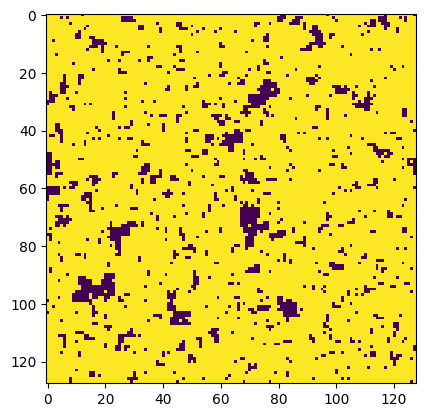

In [83]:
lattice = load_data('optimized/lattice/lattice_128x128_T_1.700000_IT_10000000_p_0.060000_seed_440.txt')
plt.imshow(lattice,interpolation = "nearest")

In [14]:
spin = "   0    2    4    6    8   10   12   14   16   18   20   22   24   26   28   30"   
hamB = "0101 1000 0101 0110 1001 0100 1101 1010 0110 0001 1100 1110 0101 0001 1001 1000"

spin = "   1    3    5    7    9   11   13   15   17   19   21   23    25  27   29   31"
hamW = "0000 1110 0000 0111 0100 0110 0100 1001 0111 0000 0100 0111 0110 1110 0100 0110"

In [39]:
print("26. spin up = 1 --> weiß letzte Reihe spin unten up")
print("26. spin down = -1 --> weiß erste Reihe up gleich -1")
print("26. spin left = 1 --> weiß nullte Reihe rechts = 1")
print("26. spin rechts = -1 --> weiß nullte Reihe links = -1")

26. spin up = 1 --> weiß letzte Reihe spin unten up
26. spin down = -1 --> weiß erste Reihe up gleich -1
26. spin left = 1 --> weiß nullte Reihe rechts = 1
26. spin rechts = -1 --> weiß nullte Reihe links = -1


In [57]:
bonds_new[0,6*4:6*4+4]

array([ 1.,  1.,  1., -1.])

In [16]:
spinb = 
black = "0101 1000 0101 0110 1001 0100 1101 1010 0110 0001 1100 1110 0101 0001 1001 1000"

In [17]:
spinw = "  31   29   27   25   23   21   19   17   15   13   11    9    7    5    3    1"
white = "0000 1110 0000 0111 0100 0110 0100 1001 0111 0000 0100 0111 0110 1110 0100 0110"

In [22]:
spinw = "  63   61   59   57   55   53   51   49   47   45   43   41   39   37   35   33"
white = "1001 1101 1111 0101 1001 0101 1110 1011 0000 1111 1111 0110 0010 0011 1001 0111"

In [23]:
spinb = "  62   60   58   56   54   52   50   48   46   44   42   40   38   36   34   32"
black = "1011 0110 1110 1111 0010 0110 0100 0011 0101 1110 0111 0101 0101 0111 0011 1110"

In [13]:
l_n = load_data('optimized/lattice/lattice_128x128_T_1.800000_IT_00000001_p_0.500000_seed_430.txt')

In [14]:
l_o = np.loadtxt('test_rng/lattices/lattice_1_seed_43.txt')

In [15]:
indices = np.nonzero(l_n - l_o)

### HamwD

In [80]:
spinx = "  31   29   27   25   23   21   19   17   15   13   11    9    7    5    3    1"
hamBx = "0000 1110 0000 0111 0100 0110 0100 1001 0111 0000 0100 0111 0110 1110 0100 0110"

spinB = "  30   28   26   24   22   20   18   16   14   12   10    8    6    4    2    0"
ct_x1 = "0000 0001 0000 0001 0000 0001 0000 0000 0001 0000 0000 0001 0001 0001 0000 0001"

ct_x2 = "0000 0001 0010 0001 0000 0001 0010 0010 0001 0000 0010 0001 0001 0001 0000 0001"

sd_x1 = "0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0000 0010"

spiny = "  63   61   59   57   55   53   51   49   47   45   43   41   39   37   35   33"
hamBy = "1001 1101 1111 0101 1001 0101 1110 1011 0000 1111 1111 0110 0010 0011 1001 0111"

spinb = "  62   60   58   56   54   52   50   48   46   44   42   40   38   36   34   32"
ct_y1 = "0000 0000 0001 0000 0000 0000 0001 0001 0000 0001 0001 0001 0001 0001 0000 0001"

ct_y2 = "0000 0000 0001 0000 0000 0000 0001 0001 0000 0001 0001 0001 0001 0001 0000 0001"

ct_y3 = "0010 0010 0011 0010 0010 0000 0011 0001 0010 0011 0001 0001 0011 0011 0010 0001"

In [32]:
readBack = 1

if (not readBack):
    print("HELLO")
else:
    print(1)

1


In [76]:
np.arange(32)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [79]:
s_b = "  30   28   26   24   22   20   18   16   14   12   10    8    6    4    2    0"
i_x = "0100100101100101100001011110101001010000111011010101000110001011"

s_w = "  31   29   27   25   23   21   19   17   15   13   11    9    7    5    3    1"
i_y = "0000111000000111010001100100100101110000010001110110111001000110"

for s in range(len(i_x)):
    '''
    if s%4 == 2:
        check = i_x[s] == i_y[s+5]
        if check == False:
            print(s)
    '''
    if s%4 == 3:
        check = i_x[s] == i_y[s-1]
        if check == False:
            print(s)
        

### Indices

In [19]:
X = 6
Y = 6
Y2 = int(Y/2)

lattice = np.arange(X*Y).reshape(X,Y)

lattice_b = np.zeros((X,Y2))
lattice_w = np.zeros((X,Y2))

for i in range(X):
    if i%2 == 0:
        lattice_b[i,:] = lattice[i,0::2]
        lattice_w[i,:] = lattice[i,1::2]
    else:
        lattice_b[i,:] = lattice[i,1::2]
        lattice_w[i,:] = lattice[i,0::2]
        
interactions = np.arange(2*X*Y)
interactions_reshaped = interactions.reshape((2*X,Y))

In [20]:
is_black = False

In [21]:
for tid in range(X*Y2):
    
        i = int(tid/Y2)
        j = tid % Y2

        ipp = (i + 1) if (i + 1 < X) else 0
        inn = (i - 1) if (i - 1 >= 0) else X - 1
        jpp = (j + 1) if (j + 1 < Y2) else 0
        jnn = (j - 1) if (j - 1 >= 0) else Y2 - 1

        if (is_black):
            
            icpp = 2*(X-1)*Y2 + 2*(Y2*(i+1) + j) + i%2
            
            icnn = 2*(X-1)*Y2 + 2*(Y2*(inn+1) + j) + i%2

            joff = jpp if (i%2) else jnn
            
            if (i % 2):
                if (j+1 >= Y2):
                    jcoff = 2*(i*Y2 + j + 1) - 1
                
                else:
                    jcoff = 2*(i*Y2 + joff) - 1
            else:
                jcoff = 2 * (i*Y2 + joff) + 1

                
            print("Spin of interest:", lattice_b[i,j])
            print("Up neighbor:", lattice_w[inn,j], "with", interactions[icnn])
            print("Down neighbor:", lattice_w[ipp,j], "with", interactions[icpp])
            print("Right neighbor:", lattice_w[i,j], "with", interactions[2*(i*Y2+j)])
            print("Left neighbor:", lattice_w[i, joff], "with", interactions[jcoff])
            print("----------------------------------")
    
        else:
        
            icpp = 2*(X - 1)*Y2 + 2*(Y2*(i+1) + j) + (i+1)%2
            icnn = 2*(X - 1)*Y2 + 2*(Y2*(inn+1) + j) + (i+1)%2

            joff = jnn if (i%2) else jpp

            if (i%2):
                jcoff = 2*(i*Y2 + joff) + 1
            else:
                if (j+1 >= Y2):
                    jcoff = 2*(i*Y2 + j + 1) - 1
                else:
                    jcoff = 2*(i*Y2 + joff) - 1

            print("Spin of interest:", lattice_w[i,j])
            print("Up neighbor:", lattice_b[inn,j], "with", interactions[icnn])
            print("Down neighbor:", lattice_b[ipp,j], "with", interactions[icpp])
            print("Right neighbor:", lattice_b[i,j], "with", interactions[2*(i*Y2+j)])
            print("Left neighbor:", lattice_b[i, joff], "with", interactions[jcoff])
            print("----------------------------------")

Spin of interest: 1.0
Up neighbor: 31.0 with 67
Down neighbor: 7.0 with 37
Right neighbor: 0.0 with 0
Left neighbor: 2.0 with 1
----------------------------------
Spin of interest: 3.0
Up neighbor: 33.0 with 69
Down neighbor: 9.0 with 39
Right neighbor: 2.0 with 2
Left neighbor: 4.0 with 3
----------------------------------
Spin of interest: 5.0
Up neighbor: 35.0 with 71
Down neighbor: 11.0 with 41
Right neighbor: 4.0 with 4
Left neighbor: 0.0 with 5
----------------------------------
Spin of interest: 6.0
Up neighbor: 0.0 with 36
Down neighbor: 12.0 with 42
Right neighbor: 7.0 with 6
Left neighbor: 11.0 with 11
----------------------------------
Spin of interest: 8.0
Up neighbor: 2.0 with 38
Down neighbor: 14.0 with 44
Right neighbor: 9.0 with 8
Left neighbor: 7.0 with 7
----------------------------------
Spin of interest: 10.0
Up neighbor: 4.0 with 40
Down neighbor: 16.0 with 46
Right neighbor: 11.0 with 10
Left neighbor: 9.0 with 9
----------------------------------
Spin of interest

In [19]:
lattice

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [21]:
interactions_reshaped[:6,:]

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [81]:
interactions_reshaped[6:,:]

array([[36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65],
       [66, 67, 68, 69, 70, 71]])